In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2185e6b96c8>)

In [3]:
train_data = pd.read_table('ratings.txt')

In [4]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [6]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [7]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [8]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [9]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in train_data['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


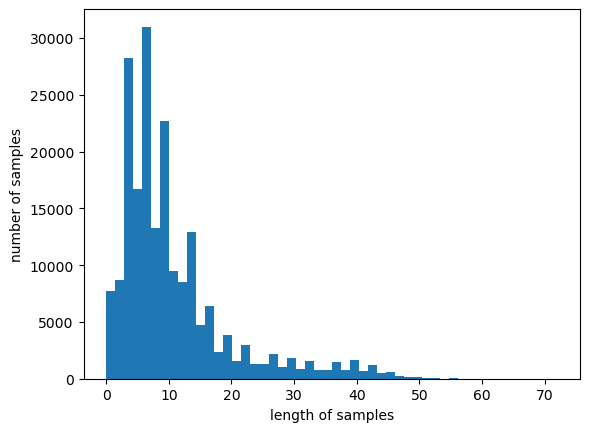

In [13]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
tokenized_data[:5] # 상위 5개 출력

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '그렇다',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화']]

In [17]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [18]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [22]:
type(model.wv.vectors)

numpy.ndarray

In [19]:
# '최민식'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("최민식"))

[('한석규', 0.8407109975814819), ('안성기', 0.8309076428413391), ('최민수', 0.8258587718009949), ('이정재', 0.8065681457519531), ('서영희', 0.8065228462219238), ('이민호', 0.8064916133880615), ('김명민', 0.8062684535980225), ('양동근', 0.803118884563446), ('단역', 0.7966085076332092), ('김수현', 0.795410692691803)]


In [20]:
# '히어로'과 유사한 단어들 뽑아보기
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8757203221321106), ('호러', 0.8380078673362732), ('무협', 0.8336464166641235), ('물', 0.8320494890213013), ('느와르', 0.8292658925056458), ('물의', 0.8233439922332764), ('블록버스터', 0.8171915411949158), ('무비', 0.8047360181808472), ('블랙', 0.7939600944519043), ('로코', 0.7869396805763245)]


In [23]:
from sklearn.cluster import KMeans
import numpy as np
# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
seed = 11
rng = np.random.default_rng(seed)

k = 5
kmeans = KMeans(n_clusters=k, random_state=seed) # k-평균++ 초기화 사용

In [25]:
y_pred = kmeans.fit_predict(model.wv.vectors) # 클러스터링 결과 각 샘플의 클러스터 레이블을 리턴 받으려면 fit_predict 사용
y_pred

array([3, 1, 0, ..., 4, 4, 4])

In [27]:
kmeans.fit(model.wv.vectors) # 클러스터링을 수행하고 그 결과를 객체의 속성에 저장하는 것까지만 수행하려면 fit 사용

KMeans(n_clusters=5, random_state=11)

In [28]:
kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([3, 1, 0, ..., 4, 4, 4])

In [29]:
# 각 클러스터의 센트로이드(중심)
kmeans.cluster_centers_

array([[-1.88704371e-01,  2.31771827e-01, -7.78864861e-01,
        -1.69858947e-01, -7.74935260e-02, -4.22769666e-01,
        -1.72613084e-01,  2.36873314e-01,  2.39717543e-01,
         5.74662566e-01, -3.68280619e-01, -2.14731917e-01,
        -1.52717054e-01,  1.31751508e-01,  1.21930391e-01,
        -1.73585996e-01,  2.47065544e-01, -5.72213471e-01,
         3.82259607e-01, -1.74416572e-01,  3.38304579e-01,
         2.37625808e-01, -1.51149809e-01,  2.42153794e-01,
         2.34912142e-01, -1.42689735e-01,  2.03006715e-02,
         1.19155228e-01, -1.56443104e-01, -2.88183391e-01,
         5.01127124e-01, -1.31848693e-01, -5.97293496e-01,
        -2.39569783e-01,  1.89454377e-01,  2.32348770e-01,
        -1.09119818e-01, -4.63546097e-01, -2.40040779e-01,
        -7.92142510e-01, -5.42704523e-01, -1.86984792e-01,
        -1.67945977e-02, -1.73167735e-02,  2.14188639e-02,
         1.14259586e-01, -8.69923308e-02,  2.62582988e-01,
         1.62341207e-01, -9.23178047e-02,  8.40318054e-0

In [31]:
# 이너셔(inertia): 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
kmeans.inertia_

101163.046875

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(model.wv.vectors)

DBSCAN(eps=0.05)

In [33]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [34]:
# 핵심 샘플들의 인덱스
dbscan.core_sample_indices_[:10]

array([], dtype=int64)

In [35]:
# 핵심 샘플들
dbscan.components_[:5]

array([], shape=(0, 100), dtype=float64)

In [36]:
print(len(dbscan.core_sample_indices_))
print(len(dbscan.components_))

0
0


In [ ]:
# scikit-learn을 이용한 병합 클러스터링
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage="complete")
agg = agg.fit(X)